In [1]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np 
import pandas as pd 
from tensorflow.keras.applications.resnet_v2 import ResNet50V2,preprocess_input
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from tqdm import tqdm

In [3]:
im_size = 224
train_x = []
train_y= []
val_x = []
val_y= []
dict_label={}
import os 
trainfolder_list = os.listdir("/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/train")
valfolder_list = os.listdir("/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/val")
i=0
for folder in trainfolder_list:
  dict_label[folder] = i
  i+=1



In [4]:
for folder in tqdm(trainfolder_list):
  for filename in os.listdir('/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/train/'+folder):
    img = cv2.resize(cv2.imread('/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/train/'+folder+'/'+filename,cv2.IMREAD_COLOR),((im_size,im_size)))
    img_array = preprocess_input(np.expand_dims(np.array(img[...,::-1].astype(np.float32)).copy(), axis=0))
    train_x.append(img_array.reshape(3,im_size,im_size))
    train_y.append(dict_label[folder])

100%|██████████| 10/10 [01:48<00:00, 10.88s/it]


In [5]:
for folder in tqdm(valfolder_list):
  for filename in os.listdir('/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/val/'+folder):
    img = cv2.resize(cv2.imread('/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/val/'+folder+'/'+filename,cv2.IMREAD_COLOR),((im_size,im_size)))
    img_array = preprocess_input(np.expand_dims(np.array(img[...,::-1].astype(np.float32)).copy(), axis=0))
    val_x.append(img_array.reshape(3,im_size,im_size))
    val_y.append(dict_label[folder])

100%|██████████| 10/10 [00:03<00:00,  2.86it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


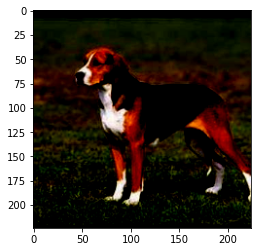

0
{'n02089973': 0, 'n02115641': 1, 'n02111889': 2, 'n02093754': 3, 'n02099601': 4, 'n02105641': 5, 'n02096294': 6, 'n02087394': 7, 'n02086240': 8, 'n02088364': 9}
images-size: (3, 224, 224)
12464
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [6]:
plt.imshow(train_x[150].reshape(224,224,3))
plt.show()
print(train_y[150])
print(dict_label)

print("images-size:", train_x[0].shape)
print(len(train_y))

print(val_y)

In [23]:
import torch
import torchvision.models as models
model = models.resnet18(pretrained = True)
model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [24]:
# Freeze the parameters 
for param in model.parameters():
    param.requires_grad = False 

In [25]:
#Classifier architecture to put on top of resnet18
from torch import nn
from collections import OrderedDict
fc = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(512,100)),
    ('relu', nn.ReLU()),
    ('fc2', nn.Linear(100,10)),
    ('output', nn.LogSoftmax(dim=1))
]))

model.fc = fc

In [26]:
#shifting model to gpu
model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
from torch.utils.data import Dataset, DataLoader, ConcatDataset
dataset=list(zip(train_x, train_y))
dataloader = DataLoader(dataset, batch_size = 64, shuffle=True)

In [28]:
validataset=list(zip(val_x, val_y))
valiloader = DataLoader(validataset, batch_size = 64, shuffle=False)

In [29]:

from torch import optim
def train(model, trainloader, criterion, optimizer, epochs = 5):
    train_loss =[]
    validate_loss =[]
    for e in range(epochs):
        running_loss =0
        for images, labels in trainloader:
            inputs, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            img = model(inputs)
            
            loss = criterion(img, labels)
            running_loss+=loss
            loss.backward()
            optimizer.step()
        print("Epoch : {}/{}..".format(e+1,epochs),
         "Training Loss: {:.6f}".format(running_loss/len(train_y))) 
        train_loss.append(running_loss)
    
    
    
epochs = 7
model.train()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
criterion = nn.NLLLoss()    
train(model,dataloader,criterion, optimizer, epochs)   

Epoch : 1/7.. Training Loss: 0.033367
Epoch : 2/7.. Training Loss: 0.031000
Epoch : 3/7.. Training Loss: 0.030367
Epoch : 4/7.. Training Loss: 0.029788
Epoch : 5/7.. Training Loss: 0.029524
Epoch : 6/7.. Training Loss: 0.029287
Epoch : 7/7.. Training Loss: 0.028981


In [30]:

model.eval()
fn_list = []
pred_list = []
for x, fn in valiloader:
    with torch.no_grad():
        x = x.to(device)
        output = model(x)
        pred = torch.argmax(output, dim=1)
        pred_list += [p.item() for p in pred]

In [31]:
print(pred_list)
print(val_y)

[7, 5, 9, 7, 9, 1, 9, 9, 4, 1, 7, 9, 9, 7, 8, 0, 9, 7, 7, 9, 1, 9, 8, 9, 0, 1, 9, 1, 4, 8, 7, 8, 9, 9, 0, 5, 2, 2, 8, 1, 4, 9, 9, 0, 9, 9, 5, 9, 6, 0, 6, 7, 6, 6, 6, 6, 8, 3, 7, 6, 6, 4, 6, 6, 4, 7, 6, 6, 6, 6, 6, 1, 7, 3, 9, 6, 7, 7, 6, 8, 6, 9, 7, 7, 8, 8, 6, 7, 6, 9, 7, 6, 6, 7, 7, 4, 4, 7, 6, 1, 6, 7, 6, 6, 8, 1, 7, 7, 7, 7, 4, 4, 9, 7, 6, 3, 8, 8, 6, 9, 7, 9, 7, 4, 1, 3, 8, 4, 1, 1, 6, 7, 7, 3, 6, 7, 7, 4, 1, 5, 7, 4, 4, 1, 4, 8, 9, 7, 7, 2, 2, 4, 2, 2, 9, 2, 2, 5, 5, 2, 2, 9, 6, 5, 2, 5, 2, 8, 1, 2, 2, 7, 1, 8, 2, 8, 2, 7, 4, 1, 5, 2, 2, 2, 3, 8, 2, 7, 2, 8, 8, 2, 2, 9, 2, 2, 2, 2, 2, 4, 6, 8, 7, 9, 3, 7, 4, 8, 8, 8, 1, 9, 6, 8, 2, 9, 5, 8, 9, 8, 3, 7, 5, 2, 8, 9, 8, 1, 8, 6, 7, 7, 8, 9, 7, 6, 8, 4, 1, 1, 7, 8, 8, 8, 8, 2, 9, 7, 6, 9, 5, 6, 7, 5, 7, 9, 6, 5, 9, 8, 2, 8, 6, 7, 7, 9, 9, 4, 9, 4, 8, 2, 4, 8, 3, 1, 7, 0, 9, 7, 5, 6, 2, 5, 8, 6, 6, 4, 9, 7, 2, 3, 5, 5, 8, 1, 8, 7, 5, 5, 7, 1, 6, 7, 7, 3, 6, 8, 8, 6, 1, 7, 7, 6, 3, 7, 4, 2, 5, 7, 1, 7, 3, 6, 7, 8, 7, 9, 6, 2, 7, 6, 6, 

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
array=confusion_matrix(val_y, pred_list)
print(array)

[[ 5  6  2  0  3  3  1  7  5 18]
 [ 1 19  0  2  6  3  1 11  3  4]
 [ 0  3 25  1  3  5  1  3  6  3]
 [ 0  5  2  7  2  2 11 15  4  2]
 [ 0  6  1  3  8  1  7 15  5  4]
 [ 1  2  4  2  4  9  6  8  7  7]
 [ 0  2  0  2  4  0 22 13  4  3]
 [ 1  8  1  3  2  0  9 22  0  4]
 [ 0  4  3  2  2  2  5  8 16  8]
 [ 2  8  0  0  2  0  7  7  7 17]]


In [ ]:
#Doing dummy classifier
from sklearn.dummy import DummyClassifier
X = val_y
y = val_y
dummy_clf = DummyClassifier(strategy="stratified")  #or most_frequent,stratified
dummy_clf.fit(X, y)
print("dummy classifier result\n")
#print(dummy_clf.score(X, y))
x_dummy=dummy_clf.predict(X)
print(classification_report(val_y, x_dummy))

dummy classifier result

              precision    recall  f1-score   support

           0       0.07      0.08      0.07        50
           1       0.08      0.10      0.09        50
           2       0.22      0.26      0.24        50
           3       0.10      0.08      0.09        50
           4       0.06      0.04      0.05        50
           5       0.04      0.04      0.04        50
           6       0.09      0.10      0.09        50
           7       0.00      0.00      0.00        50
           8       0.07      0.08      0.07        50
           9       0.10      0.10      0.10        50

    accuracy                           0.09       500
   macro avg       0.08      0.09      0.08       500
weighted avg       0.08      0.09      0.08       500



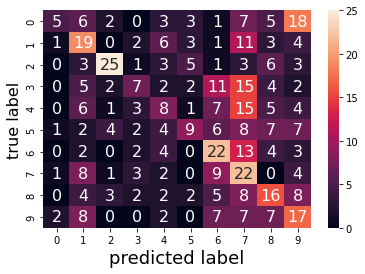



classification report:

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        50
           1       0.30      0.38      0.34        50
           2       0.66      0.50      0.57        50
           3       0.32      0.14      0.19        50
           4       0.22      0.16      0.19        50
           5       0.36      0.18      0.24        50
           6       0.31      0.44      0.37        50
           7       0.20      0.44      0.28        50
           8       0.28      0.32      0.30        50
           9       0.24      0.34      0.28        50

    accuracy                           0.30       500
   macro avg       0.34      0.30      0.29       500
weighted avg       0.34      0.30      0.29       500



In [33]:
#plot the confusion_matrix, and classification_report
import seaborn as sn
df_cm = pd.DataFrame(array, range(10), range(10))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.xlabel('predicted label', fontsize=18)
plt.ylabel('true label', fontsize=16)
plt.show()
print("\n\nclassification report:\n\n"+classification_report(val_y, pred_list))